# Parametric Method to calculate VaR

## Definition

The Parametric method, also known as variance-covariance method, is one of the approaches used to calculate VaR. In the Parametric VaR method, the volatility of the portfolio is estimated based on historical data or statistical models. The standard deviation of the portfolio's returns is often used as a measure of volatility. Once the volatility is estimated, VaR can be calculated using a normal distribution assumption.



The formula for Parametric VaR is often given by:

$VaR = \text{Portfolio Value} \times \text{Z-score} \times \text{Portfolio Volatility} \times \sqrt{\text{Time Horizon}}$

Where:
- Z-score represents the number of standard deviations corresponding to the desired confidence level (e.g., 1.96 for a 95% confidence level).
- Portfolio Volatility is the standard deviation of the portfolio's returns.

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt

## Implementation

We will use `yfinance` library to download historical stock data for this exercise.

### Set Timeframe and Define Tickers

First, we will define the time range for our analysis and create a list of tickers we want to include in our portfolio:

In [3]:
years=15
endDate=dt.datetime.now()
startDate=endDate-dt.timedelta(days=365*years)

tickers=['RELIANCE.NS','HDFCBANK.NS','TATASTEEL.NS','INFY.NS','ICICIBANK.NS']

In [4]:
print(endDate)

2025-07-05 13:51:28.193866


In [5]:
print(startDate)

2010-07-09 13:51:28.193866


# Downloading ticker data and calculate Log returns

We download the data using for loop and iterating it over the tickers list and created a dataframe to include only closing prices from which we will calculate log returns

In [6]:
adj_close_df=pd.DataFrame()
for ticker in tickers:
    data=yf.download(ticker,start=startDate,end=endDate)
    adj_close_df[ticker]=data['Close']
log_returns=np.log(adj_close_df/adj_close_df.shift(1))
log_returns=log_returns.dropna()

C:\Users\Dell\AppData\Local\Temp/ipykernel_16252/2837166152.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data=yf.download(ticker,start=startDate,end=endDate)
[*********************100%***********************]  1 of 1 completed
C:\Users\Dell\AppData\Local\Temp/ipykernel_16252/2837166152.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data=yf.download(ticker,start=startDate,end=endDate)
[*********************100%***********************]  1 of 1 completed
C:\Users\Dell\AppData\Local\Temp/ipykernel_16252/2837166152.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data=yf.download(ticker,start=startDate,end=endDate)
[*********************100%***********************]  1 of 1 completed
C:\Users\Dell\AppData\Local\Temp/ipykernel_16252/2837166152.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data=yf.download(ticker,start=startDate,end=endDat

In [7]:
print(log_returns)

            RELIANCE.NS  HDFCBANK.NS  TATASTEEL.NS   INFY.NS  ICICIBANK.NS
Date                                                                      
2010-07-12    -0.001325     0.023050      0.019885  0.007661      0.019838
2010-07-13     0.016945     0.011208      0.021957 -0.034838      0.006693
2010-07-14    -0.003590     0.006613     -0.005716 -0.019442     -0.009159
2010-07-15     0.002799    -0.011425      0.013449  0.006070     -0.010603
2010-07-16    -0.009830    -0.011532     -0.007832  0.006285      0.023036
...                 ...          ...           ...       ...           ...
2025-06-30    -0.009814    -0.006673     -0.010523 -0.003863     -0.011279
2025-07-01     0.018356     0.005282      0.001876  0.003117     -0.009591
2025-07-02    -0.006301    -0.013056      0.035716  0.002300     -0.002937
2025-07-03    -0.000659     0.000554      0.000181  0.005079     -0.001332
2025-07-04     0.006240     0.001107     -0.017634  0.013500      0.011782

[3698 rows x 5 columns]


In [9]:
data

Price,Close,High,Low,Open,Volume
Ticker,INFY.NS,INFY.NS,INFY.NS,INFY.NS,INFY.NS
Date,,,,,
2010-07-09,257.174927,257.774502,253.980156,253.980156,7859112
2010-07-12,259.152618,260.414429,255.045059,255.049538,8597240
2010-07-13,250.279709,257.286740,248.870250,256.834813,25502384
2010-07-14,245.460709,251.375973,244.932729,249.671193,14193928
2010-07-15,246.955215,248.422834,245.201213,246.002139,8328136
...,...,...,...,...,...
2025-06-30,1601.800049,1615.000000,1594.099976,1615.000000,6294505
2025-07-01,1606.800049,1617.699951,1600.500000,1609.000000,4178937


In [10]:
print(adj_close_df)

            RELIANCE.NS  HDFCBANK.NS  TATASTEEL.NS      INFY.NS  ICICIBANK.NS
Date                                                                         
2010-07-09   217.420197   177.563248     31.551899   257.174927    135.777664
2010-07-12   217.132401   181.703659     32.185593   259.152649    138.498138
2010-07-13   220.842957   183.751663     32.900108   250.279739    139.428238
2010-07-14   220.051483   184.970749     32.712593   245.460739    138.157104
2010-07-15   220.668182   182.869507     33.155518   246.955231    136.699951
...                 ...          ...           ...          ...           ...
2025-06-30  1500.599976  2001.500000    159.759995  1601.800049   1445.800049
2025-07-01  1528.400024  2012.099976    160.059998  1606.800049   1432.000000
2025-07-02  1518.800049  1986.000000    165.880005  1610.500000   1427.800049
2025-07-03  1517.800049  1987.099976    165.910004  1618.699951   1425.900024
2025-07-04  1527.300049  1989.300049    163.009995  1640.699951 

###  Create Equally Weighted Portfolio and Calculate Historical Returns

We will create an equally weighted portfolio and calculate the historical returns for this portfolio:

In [11]:
portfolio_value=10000000
weights=np.array([1/len(tickers)]*len(tickers)) #create an array of weights
historical_returns=(log_returns*weights).sum(axis=1) # Multiply return of each stocks with their weights and sum it up

In [12]:
print(weights)

[0.2 0.2 0.2 0.2 0.2]


In [13]:
print(historical_returns)

Date
2010-07-12    0.013822
2010-07-13    0.004393
2010-07-14   -0.006259
2010-07-15    0.000058
2010-07-16    0.000026
                ...   
2025-06-30   -0.008430
2025-07-01    0.003808
2025-07-02    0.003144
2025-07-03    0.000765
2025-07-04    0.002999
Length: 3698, dtype: float64


## Multiplying VaR with square root of days requires assumptions like Normal distribution, returns are uncorelated, constant volatility. Hence we calculate rolling return, i.e Cumulative return

In [15]:
days=5
historical_x_day_returns=historical_returns.rolling(window=days).sum() 

In [16]:
print(historical_x_day_returns)

Date
2010-07-12         NaN
2010-07-13         NaN
2010-07-14         NaN
2010-07-15         NaN
2010-07-16    0.012040
                ...   
2025-06-30    0.028706
2025-07-01    0.028728
2025-07-02    0.021189
2025-07-03    0.006784
2025-07-04    0.002285
Length: 3698, dtype: float64


### Create Covariance Matrix and Calculate Portfolio Standard Deviation
No: of trading days ina  a year is 252

weights.T Transposes the weight vector from row to column

@ is matrix multiplication vector in python

Calcualtion of annualised std dev


In [17]:

cov_matrix=log_returns.cov()*252
portfolio_std_dev=np.sqrt(weights.T @ cov_matrix @ weights)

### Calculate VaR at Different Confidence Levels

We will calculate the Value at Risk (VaR) at different confidence levels:

In [18]:
from scipy.stats import norm

In [19]:
confidence_intervals=[0.90,0.95,0.99]
VaRs=[]
for ci in confidence_intervals:
    VaR=portfolio_value*(norm.ppf(1-ci)*portfolio_std_dev*np.sqrt(days/252)-historical_returns.mean()*days)
    VaRs.append(VaR)

In [20]:
print(f'{"Confidence interval":<18} {"VaR Amount":>10}')
print("-" * 40)

for ci,VaR in zip(confidence_intervals,VaRs): #Zip function is used for element wise matchup
      print(f'{ci * 100:>6.0f}%: ₹{VaR:>20,.2f}')

Confidence interval VaR Amount
----------------------------------------
    90%: ₹         -394,355.86
    95%: ₹         -498,312.42
    99%: ₹         -693,317.65


### Plot the Distribution of Portfolio Returns and Parametric VaR Estimates

Finally, we will plot the distribution of the X-day portfolio returns and the parametric VaR estimates:

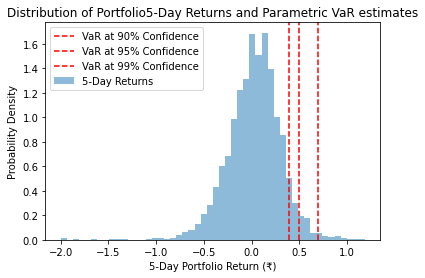

In [44]:
historical_returns_value=(historical_x_day_returns*portfolio_value)

plt.hist(historical_returns_value/1e6,bins=50,density=True,alpha=0.5,label=f'{days}-Day Returns')

for ci,VaR in zip(confidence_intervals,VaRs):
    plt.axvline(x=-VaR/1e6,linestyle='--',color='r',label='VaR at {}% Confidence'.format(int(ci*100)))
    
plt.xlabel(f'{days}-Day Portfolio Return (₹)')
plt.ylabel('Probability Density')
plt.title(f'Distribution of Portfolio{days}-Day Returns and Parametric VaR estimates')
plt.legend()
plt.show()

### Calculate Expected Shortfall at Different Confidence Levels

We will calculate the Expected Shortfall or Conditional VaR at different confidence levels:

Expected shortfall (ES), also known as Conditional Value at Risk (CVaR), is a risk measure that quantifies the expected loss given that a loss exceeds VaR threshold

In [33]:
condifdence_intervals=[0.90,0.95,0.99]
ES=[]
for ci in confidence_intervals:
    var_cutoff=-norm.ppf(1-ci)*portfolio_std_dev*np.sqrt(days/252)
    ES_cutoff=historical_returns[historical_returns > var_cutoff]
    Exp_Shortfall=portfolio_value*ES_cutoff.mean()
    ES.append(Exp_Shortfall)

In [34]:
ES

[487850.4407221546, 646875.3883447653, 904256.0875540961]

In [35]:
print(f'{"Confidence interval":<18} {"ES Amount":>10}')
print("-" * 40)

for ci,Exp_Shortfall in zip(confidence_intervals,ES): #Zip function is used for element wise matchup
      print(f'{ci * 100:>6.0f}%: ₹{Exp_Shortfall:>20,.2f}')

Confidence interval  ES Amount
----------------------------------------
    90%: ₹          487,850.44
    95%: ₹          646,875.39
    99%: ₹          904,256.09


### Backtesting the VaR using Kupiec's Test

In [39]:
from scipy.stats import norm,chi2
violations=historical_return_rupee < VaR
z=violations.sum()
print(z)


38


In [45]:
def backtest_var(violations,ci):
    n=len(violations)
    p=1-ci
    x=violations.sum()
    pi_hat=x/n
    kupiec_test=-2*np.log((1-p)**(n-x)*p**x)/(1-(pi_hat))**(n-x)*(pi_hat)**x
    p_value=1-chi2.cdf(kupiec_test,df=1)
    return{"LR Statistic": kupiec_test,
           "Violations" :x,
           "Total_obs":n,
          "P Value": p_value,
}

kupiec_result=backtest_var(violations,0.95)
print(kupiec_result)

{'LR Statistic': 4.4418165906956594e-57, 'Violations': 38, 'Total_obs': 3698, 'P Value': 1.0}


**The above test showed us a violation of 38 instead of 3698*5% i.e 184 and high p value suggests we should not reject the null hypopthesis that model is incorrect**